In [190]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [191]:
dataframe_walmart = pd.read_csv('Walmart.csv')



df = dataframe_walmart.copy(deep=True)

# print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

In [3]:
dataframe_walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
dataframe_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
pd.options.display.float_format = '{:,.0f}'.format

In [6]:
dataframe_walmart.describe().round(2)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,"6,435","6,435","6,435","6,435","6,435","6,435","6,435"
mean,23,"1,046,965",0,61,3,172,8
std,13,"564,367",0,18,0,39,2
min,1,"209,986",0,-2,2,126,4
25%,12,"553,350",0,47,3,132,7
50%,23,"960,746",0,63,3,183,8
75%,34,"1,420,159",0,75,4,213,9
max,45,"3,818,686",1,100,4,227,14


In [7]:
dataframe_walmart.columns  = dataframe_walmart.columns.str.lower()
dataframe_walmart.rename({'holiday_flag': 'Holiday_period'}, axis = 1, inplace = True)
dataframe_walmart.columns

Index(['store', 'date', 'weekly_sales', 'Holiday_period', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

In [8]:
dataframe_walmart.isnull().sum()

store             0
date              0
weekly_sales      0
Holiday_period    0
temperature       0
fuel_price        0
cpi               0
unemployment      0
dtype: int64

In [9]:
def get_season(quarter):

    if quarter == 1:
        return 'Winter'
    elif quarter == 2:
        return 'Spring'
    elif quarter == 3:
        return 'Summer'
    else:
        return 'Autumn'

In [10]:
dataframe_walmart['date'] = pd.to_datetime(dataframe_walmart['date'], format = "%d-%m-%Y")

In [11]:
dataframe_walmart['year'] = dataframe_walmart['date'].dt.year

In [12]:
dataframe_walmart['quarter'] = dataframe_walmart['date'].dt.quarter

In [13]:
dataframe_walmart['season'] = dataframe_walmart['quarter'].apply(get_season)
dataframe_walmart['month'] = dataframe_walmart['date'].dt.month
dataframe_walmart['month_name'] = dataframe_walmart['date'].dt.month_name()
dataframe_walmart['week'] = dataframe_walmart['date'].dt.isocalendar().week
dataframe_walmart['day_of_week'] = dataframe_walmart['date'].dt.day_name()

In [14]:
dataframe_walmart.head(5)

,store,date,weekly_sales,Holiday_period,temperature,fuel_price,cpi,unemployment,year,quarter,season,month,month_name,week,day_of_week
0,1,2010-02-05,"1,643,691",0,42,3,211,8,2010,1,Winter,2,February,5,Friday
1,1,2010-02-12,"1,641,957",1,39,3,211,8,2010,1,Winter,2,February,6,Friday
2,1,2010-02-19,"1,611,968",0,40,3,211,8,2010,1,Winter,2,February,7,Friday
3,1,2010-02-26,"1,409,728",0,47,3,211,8,2010,1,Winter,2,February,8,Friday
4,1,2010-03-05,"1,554,807",0,46,3,211,8,2010,1,Winter,3,March,9,Friday


In [15]:
dataframe_walmart['week'] = dataframe_walmart['week'].astype('int32')

In [16]:
dataframe_walmart[['weekly_sales', 'temperature', 'fuel_price', 'unemployment', 'cpi']].describe()

,weekly_sales,temperature,fuel_price,unemployment,cpi
count,"6,435","6,435","6,435","6,435","6,435"
mean,"1,046,965",61,3,8,172
std,"564,367",18,0,2,39
min,"209,986",-2,2,4,126
25%,"553,350",47,3,7,132
50%,"960,746",63,3,8,183
75%,"1,420,159",75,4,9,213
max,"3,818,686",100,4,14,227


1122887.89
1041256.38


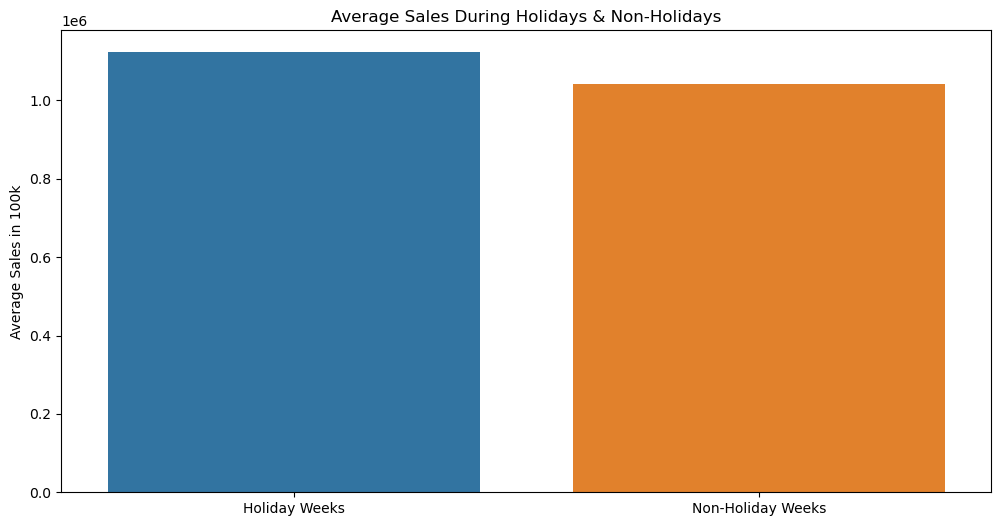

In [134]:
holiday_week_count = dataframe_walmart.groupby('Holiday_period')['weekly_sales'].count()
holiday_week_sales = dataframe_walmart.groupby('Holiday_period')['weekly_sales'].sum()

total_sales_during_holidays = holiday_week_sales[1]
total_sales_not_during_holidays = holiday_week_sales[0]

num_of_holiday_weeks = holiday_week_count[1]
num_of_non_holiday_weeks = holiday_week_count[0]

total_sales = dataframe_walmart['weekly_sales'].sum()

mean_sales_during_holidays = (total_sales_during_holidays / num_of_holiday_weeks).round(2)
mean_sales_not_during_holidays = (total_sales_not_during_holidays / num_of_non_holiday_weeks).round(2)

print(mean_sales_during_holidays)
print(mean_sales_not_during_holidays)

sales_df = pd.DataFrame([[mean_sales_during_holidays, mean_sales_not_during_holidays]], columns=['Holiday Weeks', 'Non-Holiday Weeks'])

plt.figure(figsize=(12,6))
sns.barplot(data=sales_df)
plt.title('Average Sales During Holidays & Non-Holidays')
plt.ylabel('Average Sales in 100k')
plt.show()


month_name
April       457,938,879
August      376,239,443
December    576,838,635
February    376,664,311
January     163,703,967
July        462,491,525
June        382,019,558
March       361,276,251
May         368,359,092
November    413,015,725
October     400,423,107
September   398,115,635
Name: weekly_sales, dtype: float64


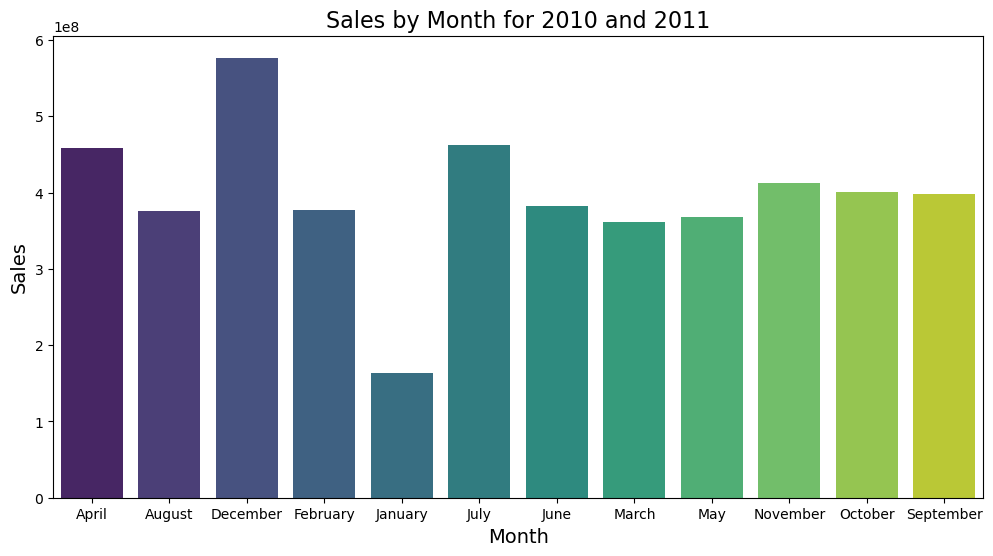

In [158]:
dataframe_walmart['date'].dt.floor('D')
sales_by_month = dataframe_walmart[dataframe_walmart['year'] != 2012]
sales_by_month = sales_by_month.groupby('month_name')['weekly_sales'].sum()
print(sales_by_month)

plt.figure(figsize = (12, 6))
sns.barplot(x = sales_by_month.index, y = sales_by_month.values, palette = 'viridis')
plt.title('Sales by Month for 2010 and 2011', fontsize = 16)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Sales', fontsize = 14)
plt.show()


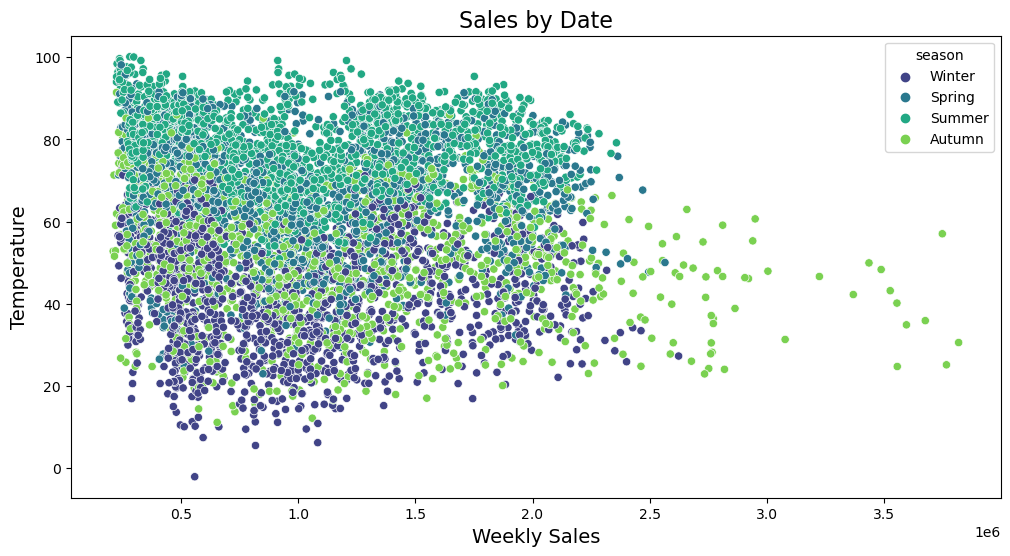

In [143]:
plt.figure(figsize = (12, 6))
sns.scatterplot(y = 'temperature', x = 'weekly_sales', data = dataframe_walmart, hue = 'season', palette = 'viridis')
plt.title('Sales by Date', fontsize = 16)
plt.ylabel('Temperature', fontsize = 14)
plt.xlabel('Weekly Sales', fontsize = 14)
plt.show()

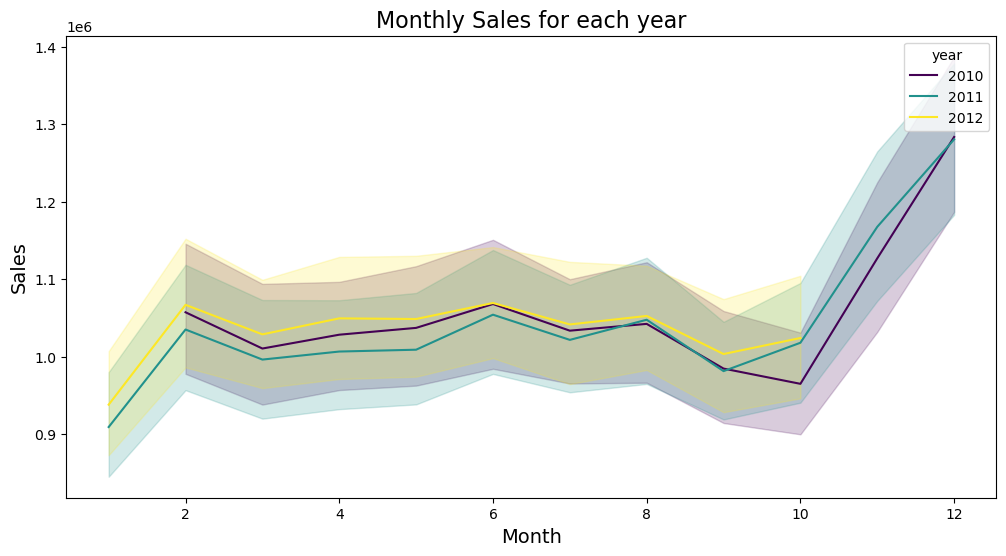

In [173]:

plt.figure(figsize = (12, 6))
sns.lineplot(data=dataframe_walmart, x = 'month', y = 'weekly_sales', hue = 'year', palette = 'viridis')
plt.title('Monthly Sales for each year', fontsize = 16)
plt.ylabel('Sales', fontsize = 14)
plt.xlabel('Month', fontsize = 14)
plt.show()

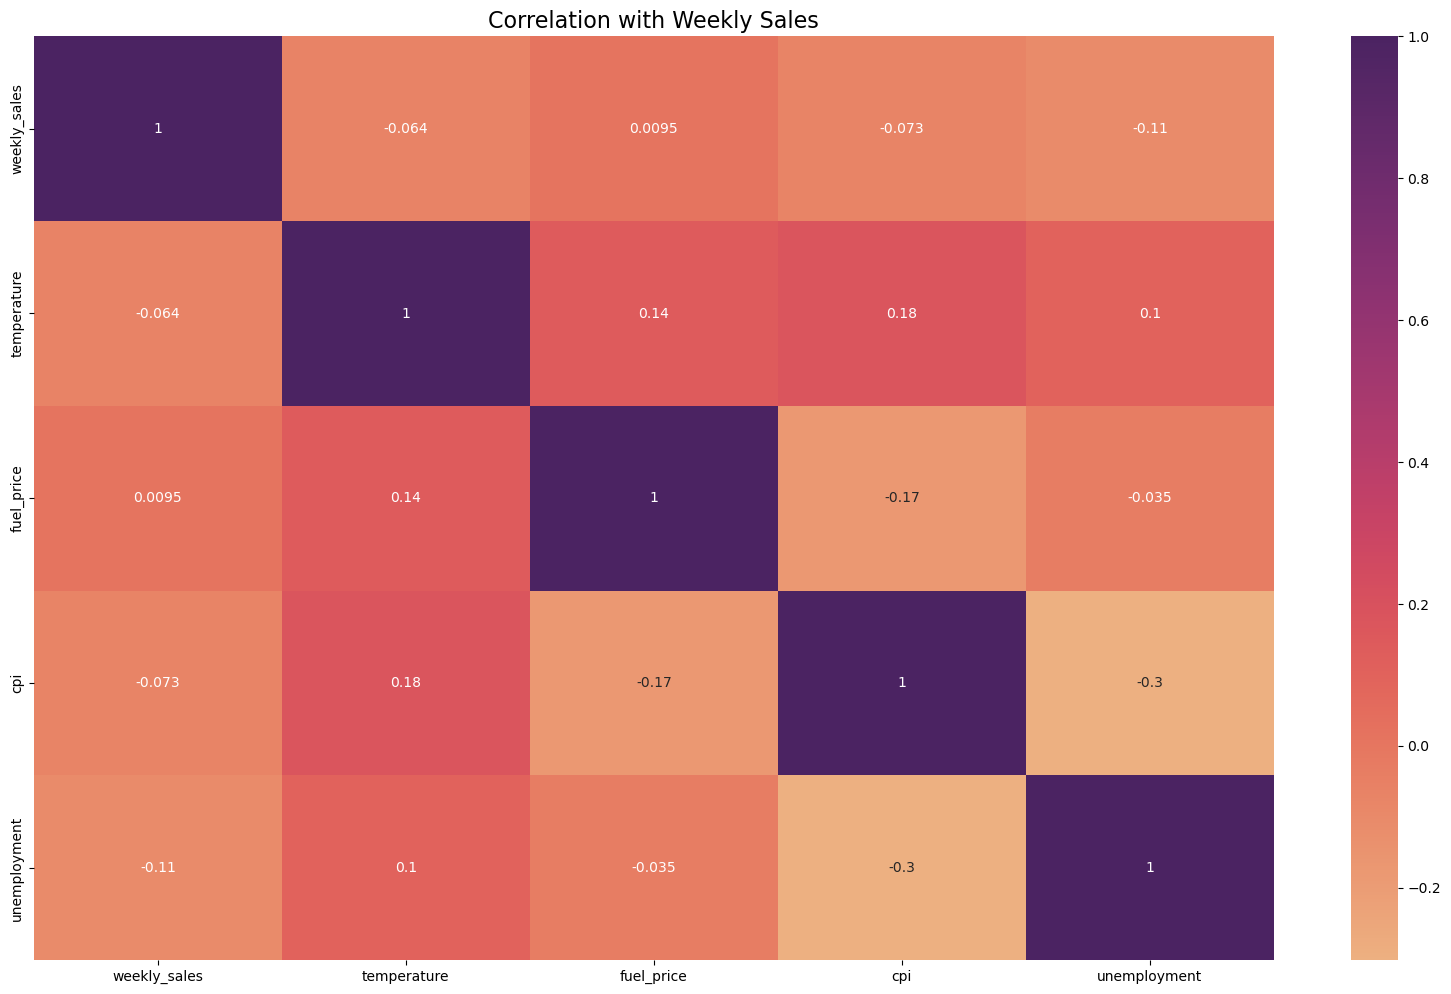

In [165]:
plt.figure(figsize = (20, 12))
plt.title('Correlation with Weekly Sales', fontsize = 16)
sns.heatmap(dataframe_walmart[['weekly_sales', 'temperature', 'fuel_price', 'cpi', 'unemployment']].corr(), annot = True, cmap='flare')
plt.show()

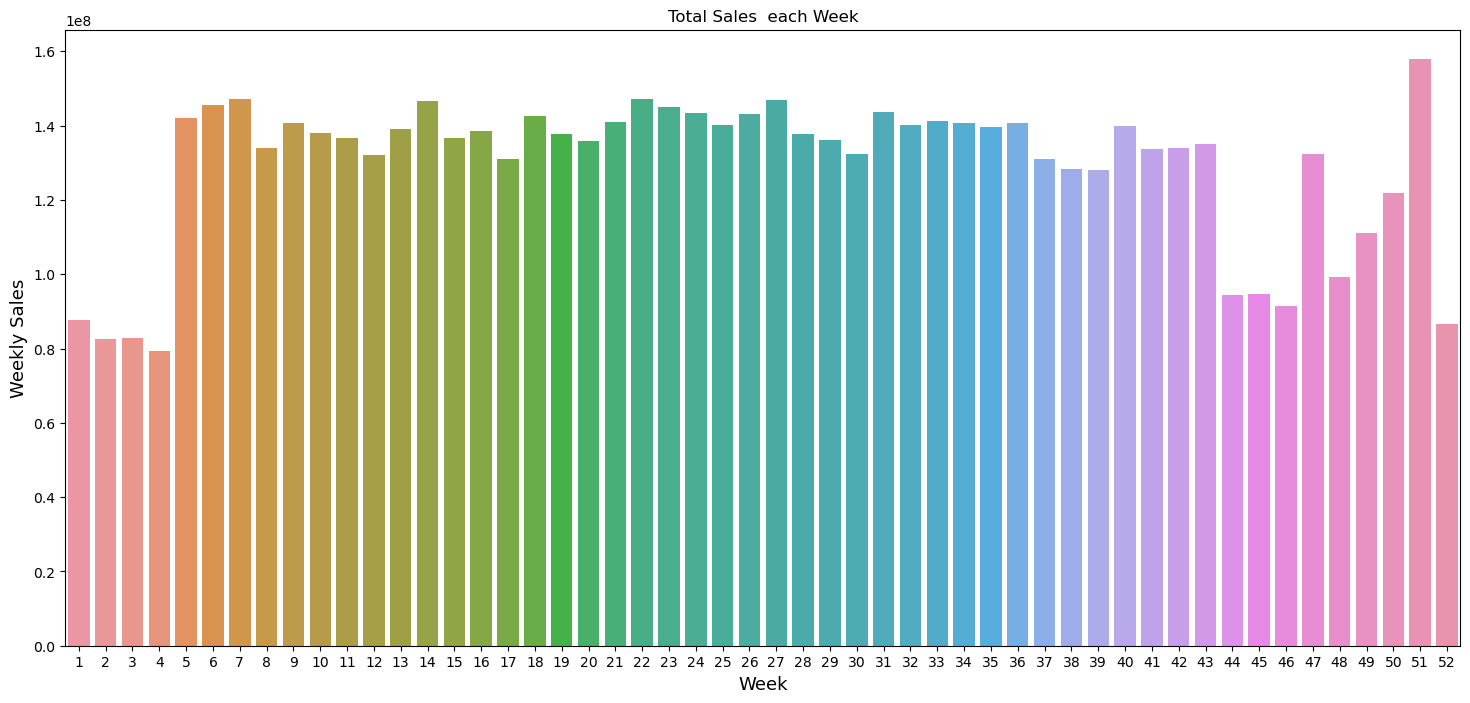

In [178]:
gp_week = dataframe_walmart.groupby('week')['weekly_sales'].sum()

plt.figure(figsize = (18, 8))
sns.barplot(data = dataframe_walmart,
            x = 'week',
            y = 'weekly_sales',
            estimator = np.sum,
            order = gp_week.index,
            ci = False)

# Add labels and title
plt.title('Total Sales  each Week')
plt.xlabel('Week', size = 13)
plt.ylabel('Weekly Sales', size = 13)
plt.show()

<Figure size 1800x800 with 0 Axes>

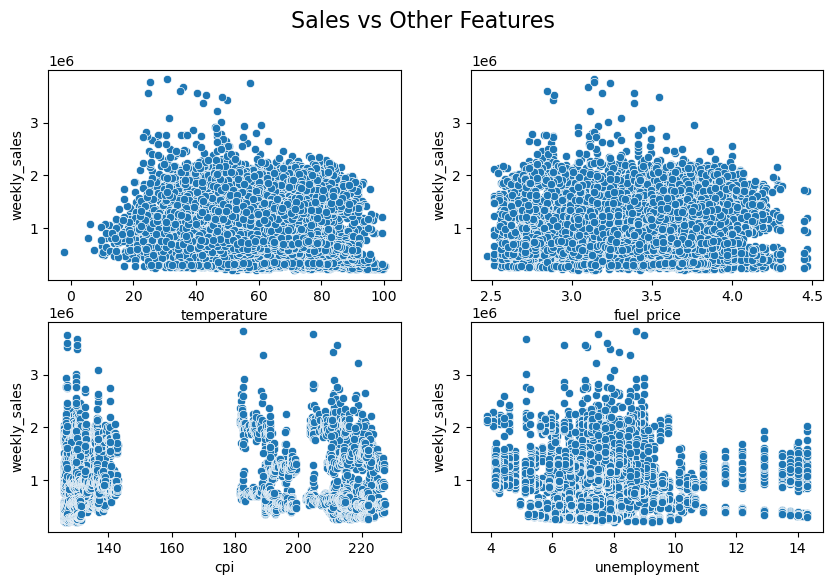

In [185]:
# Temperature	Fuel_Price	CPI	Unemployment
plt.figure(figsize = (18, 8))
fig, ax = plt.subplots(2,2)
fig.suptitle('Sales vs Other Features', fontsize = 16)

sns.scatterplot(data = dataframe_walmart, x='temperature', y='weekly_sales', ax=ax[0,0])
sns.scatterplot(data = dataframe_walmart, x='fuel_price', y='weekly_sales', ax=ax[0,1])
sns.scatterplot(data = dataframe_walmart, x='cpi', y='weekly_sales', ax=ax[1,0])
sns.scatterplot(data = dataframe_walmart, x='unemployment', y='weekly_sales', ax=ax[1,1])
plt.show()


In [ ]:
# dataframe_walmart.loc[(dataframe_walmart['Date'] == '2010-02-12')|(dataframe_walmart['Date'] == '2011-02-11')|(dataframe_walmart['Date'] == '2012-02-10'),'Super_Bowl'] = True
# dataframe_walmart.loc[(dataframe_walmart['Date'] != '2010-02-12')&(dataframe_walmart['Date'] != '2011-02-11')&(dataframe_walmart['Date'] != '2012-02-10'),'Super_Bowl'] = False
# # Labor day dates in train set
# dataframe_walmart.loc[(dataframe_walmart['Date'] == '2010-09-10')|(dataframe_walmart['Date'] == '2011-09-09')|(dataframe_walmart['Date'] == '2012-09-07'),'Labor_Day'] = True
# dataframe_walmart.loc[(dataframe_walmart['Date'] != '2010-09-10')&(dataframe_walmart['Date'] != '2011-09-09')&(dataframe_walmart['Date'] != '2012-09-07'),'Labor_Day'] = False
# # Thanksgiving dates in train set
# dataframe_walmart.loc[(dataframe_walmart['Date'] == '2010-11-26')|(dataframe_walmart['Date'] == '2011-11-25'),'Thanksgiving'] = True
# dataframe_walmart.loc[(dataframe_walmart['Date'] != '2010-11-26')&(dataframe_walmart['Date'] != '2011-11-25'),'Thanksgiving'] = False
# #Christmas dates in train set
# dataframe_walmart.loc[(dataframe_walmart['Date'] == '2010-12-31')|(dataframe_walmart['Date'] == '2011-12-30'),'Christmas'] = True
# dataframe_walmart.loc[(dataframe_walmart['Date'] != '2010-12-31')&(dataframe_walmart['Date'] != '2011-12-30'),'Christmas'] = False

In [188]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=dataframe_walmart)

ValueError: Could not interpret input 'Christmas'